<a href="https://colab.research.google.com/github/ChoiJK/JK_Mini_ImgNet_Classification/blob/master/Mini_ImageNet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import random
import os
import datetime

from google.colab import drive

TensorFlow 2.x selected.


## DataSet Load

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#load mini-imagenet dataset file from www.youplayai.com
train= np.load('./gdrive/My Drive/_DL/DataSet/Mini_ImageNet/train.npy')
val = np.load('./gdrive/My Drive/_DL/DataSet/Mini_ImageNet/val.npy')
#test = np.load('test.npy')
train_label= np.load('./gdrive/My Drive/_DL/DataSet/Mini_ImageNet/train_label.npy')
val_label = np.load('./gdrive/My Drive/_DL/DataSet/Mini_ImageNet/val_label.npy')
#test_label = np.load('test_label.npy')

In [0]:
IMG_SIZE = 84
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [23]:
print([train.shape[0]*train.shape[1], train.shape[2], train.shape[3], train.shape[4]])
print(train.shape[0])
print(train.shape[1])

[50000, 84, 84, 3]
100
500


In [0]:
train = np.reshape(train, [train.shape[0]*train.shape[1], train.shape[2], train.shape[3], train.shape[4]])
train_label = np.reshape(train_label, [train_label.shape[0]*train_label.shape[1]])
val = np.reshape(val, [val.shape[0]*val.shape[1], val.shape[2], val.shape[3], val.shape[4]])
val_label = np.reshape(val_label, [val_label.shape[0]*val_label.shape[1]])
#test = np.reshape(test, [test.shape[0]*test.shape[1], test.shape[2], test.shape[3], test.shape[4]])
#test_label = np.reshape(test_label, [test_label.shape[0]*test_label.shape[1]])

In [25]:
print(train.shape, train_label.shape)
print(val.shape, val_label.shape)
#print(test.shape, test_label.shape)

(50000, 84, 84, 3) (50000,)
(5000, 84, 84, 3) (5000,)


In [0]:
randomize = np.arange(len(train))
np.random.shuffle(randomize)
train = train[randomize]
train_label = train_label[randomize]

## Data Pipeline

In [0]:
def augment_data(image, label):
  print("Augment data called!")
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_contrast(image, lower=0.0, upper=1.0)
  # Add more augmentation of your choice
  return image, label

  def format_example(image, label):
    print("Format example called!")
    image = tf.cast(image, tf.float32)
    image = image / 255.0
    return augment_data(image, label)

In [99]:
train_ds = tf.data.Dataset.from_tensor_slices((train, train_label)).map(format_example)
val_ds = tf.data.Dataset.from_tensor_slices((val, val_label)).map(format_example)

Format example called!
Format example called!


In [0]:
SHUFFLE_BUFFER_SIZE = 10000
BATCH_SIZE = 32

train_ds = train_ds.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_ds = val_ds.batch(BATCH_SIZE)

In [101]:
for image, label in train_ds.take(1):
    print(image.shape, label)

(32, 84, 84, 3) tf.Tensor(
[35 39 19 34  1 30 95 89 60 95 87 27 96  6 62 29 84 10 84 60  9 62  4 14
 35  9 91 51 86 74 77 56], shape=(32,), dtype=int32)


## Create Model

In [0]:
def create_model():
    img_inputs = keras.Input(shape=IMG_SHAPE)
    conv_1 = keras.layers.Conv2D(32, (3, 3))(img_inputs)
    batchNorm_1 = keras.layers.BatchNormalization()(conv_1)
    activ_1 = keras.layers.Activation('relu')(batchNorm_1)
    maxpool_1 = keras.layers.MaxPooling2D((2, 2))(activ_1)
    conv_2 = keras.layers.Conv2D(64, (3, 3))(maxpool_1)
    batchNorm_2 = keras.layers.BatchNormalization()(conv_2)
    activ_2 = keras.layers.Activation('relu')(batchNorm_2)
    maxpool_2 = keras.layers.MaxPooling2D((2, 2))(activ_2)
    conv_3 = keras.layers.Conv2D(64, (3, 3))(maxpool_2)
    batchNorm_3 = keras.layers.BatchNormalization()(conv_3)
    activ_3 = keras.layers.Activation('relu')(batchNorm_3)
    flatten = keras.layers.Flatten()(activ_3)
    #dense_1 = keras.layers.Dense(256, activation='relu')(flatten)
    output = keras.layers.Dense(100, activation='softmax')(flatten)  # 레이블 개수는 100개

    model = keras.Model(inputs=img_inputs, outputs=output)
    
    return model

In [103]:
simple_model = create_model()
simple_model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 84, 84, 3)]       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 82, 82, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 82, 82, 32)        128       
_________________________________________________________________
activation_27 (Activation)   (None, 82, 82, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 39, 39, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 39, 39, 64)        256

## Training

In [0]:
import datetime, os

log_dir="./gdrive/My Drive/_DL/DataSet/Mini_ImageNet/traning/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs(log_dir)

In [105]:
num_train = train.shape[0]
num_val = val.shape[0]

steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps = round(num_val)//BATCH_SIZE

print(num_train)
print(num_val)

50000
5000


In [0]:
def train_model(model):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Creating Keras callbacks 
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
        './gdrive/My Drive/_DL/DataSet/Mini_ImageNet/traning/training_checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', period=5)
    os.makedirs('./gdrive/My Drive/_DL/DataSet/Mini_ImageNet/traning/training_checkpoints/', exist_ok=True)
    early_stopping_checkpoint = keras.callbacks.EarlyStopping(patience=5)

    history = model.fit(train_ds.repeat(),
              epochs=300, 
              steps_per_epoch=steps_per_epoch,
              validation_data=val_ds.repeat(),
              validation_steps=validation_steps,
              callbacks=[tensorboard_callback,
                         model_checkpoint_callback,
                         early_stopping_checkpoint])
    
    model.save('./gdrive/My Drive/_DL/DataSet/Mini_ImageNet/traning/mini_Imagenet_Test_JK.h5')

    return history

In [107]:
history = train_model(simple_model)

Train for 1562 steps, validate for 156 steps
Epoch 1/5
1562/1562 [==============================] - 17s 11ms/step - loss: 3.8917 - accuracy: 0.1917 - val_loss: 3.3865 - val_accuracy: 0.2155
Epoch 2/5
1562/1562 [==============================] - 15s 10ms/step - loss: 2.5140 - accuracy: 0.3827 - val_loss: 3.0639 - val_accuracy: 0.2865
Epoch 3/5
1562/1562 [==============================] - 17s 11ms/step - loss: 1.6995 - accuracy: 0.5607 - val_loss: 3.4021 - val_accuracy: 0.2648
Epoch 4/5
1562/1562 [==============================] - 17s 11ms/step - loss: 0.8493 - accuracy: 0.7702 - val_loss: 4.2000 - val_accuracy: 0.2588
Epoch 5/5
1562/1562 [==============================] - 17s 11ms/step - loss: 0.3891 - accuracy: 0.8917 - val_loss: 4.7646 - val_accuracy: 0.2410


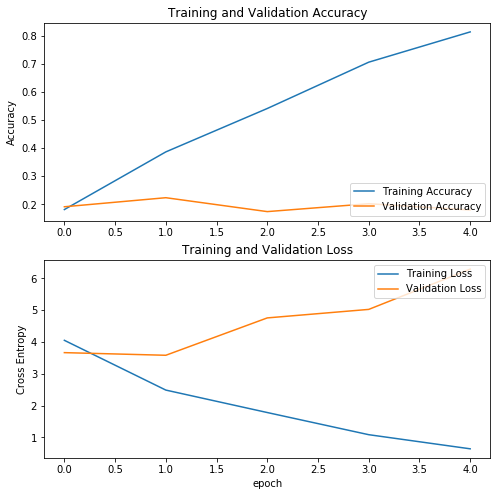

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Save / Load Example

In [0]:
inception_model.save('inception_v3_128_tf_flowes.h5')

In [0]:
loaded_model = keras.models.load_model('inception_v3_128_tf_flowes.h5')
loaded_model.evaluate(test)